In [ ]:
# Prepare Data
#
import pandas as pd;
data = pd.read_csv('data_files/final_over_data.csv');

# Use the match_id as the Key / Index column.
data.set_index("match_id", inplace = True)

# We have runs to win (numerical data). If the runs to win in last over are more than 36, the match is anyways lost.
# So, we'll convert it to Runs per bowl required. Anything above 36 will be considered as 7
# We'll bin it so that we dont have the continious data.
cut_labels = ['1','2','3','4','5','6', '7'];
cut_bins = [0, 6, 12, 18, 24, 30, 36, 200];

# Insert directly after runs to win column.
data.insert(3,'RPB',pd.cut(data['runs_to_win'], bins=cut_bins, labels=cut_labels))
data.head()

In [11]:
# This is the simplest version of Analysis (my first version)
# We'll use a Decision Tree Classifier
#
# 
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

# Split the training data into Train and Test.
train_set, test_set = train_test_split(data, test_size=0.2)


# Training columns. For now, I'm taking only few columns.
X = train_set[["innings_1_score","RPB","wickets_in_hand","bowler_econ","bowler_boundaries","batsman_sr","boundaries"]]
y = train_set["match_result"]
#y=y.astype('int')

# For now, we'll create a default tree. We'll see the accuracy / complexity and then decide the parameters.
# Some things to be adjusted are max_leaf_nodes
#
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)


In [ ]:
# Export the tree as a image.
import matplotlib.pyplot as plt

fn=["innings_1_score","RPB","wickets_in_hand","bowler_econ","bowler_boundaries","batsman_sr","boundaries"]
cn=['Won','Lost']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1000)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('decision_tree.png')

In [15]:
# Test the Decision tree to calculate the accuracy
test_results = clf.predict(test_set[["innings_1_score","RPB","wickets_in_hand","bowler_econ","bowler_boundaries","batsman_sr","boundaries"]])

from sklearn.metrics import accuracy_score
accuracy_score(test_set["match_result"],test_results)


0.8615384615384616

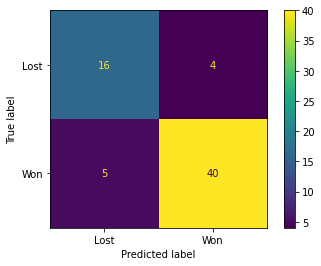

In [16]:
# Plot the confusion matrix to understand the prediction results.
from sklearn.metrics import plot_confusion_matrix
X_test = test_set[["innings_1_score","RPB","wickets_in_hand","bowler_econ","bowler_boundaries","batsman_sr","boundaries"]]
y_test = test_set["match_result"]
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [43]:
# Analyze which matches were not predicted correctly.
#test_results
#tr = pd.DataFrame(test_results, columns=['act'])
#tr.insert(1,'predicted_result',test_set["match_result"])
#tr.head()
#act_vs_predicted = test_set["match_result"]
#act_vs_predicted['predicted_result'] = tr["act"]
#act_vs_predicted.insert(1,'predicted_result',tr["act"])
#pd.concat([act_vs_predicted, pd.DataFrame(test_results)], axis=1)
#act_vs_predicted.head()

,act,predicted_result
0,Lost,NaN
1,Won,NaN
2,Won,NaN
3,Lost,NaN
4,Lost,NaN
